# Model inference

> load model and make inference

In [1]:
#| default_exp model_prediction

In [2]:
#| hide
%load_ext autoreload
%autoreload 2

In [3]:
#| export
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import cv2
from tqdm.auto import tqdm

In [4]:
from cv_tools.core import *

In [5]:
#| export

from anomalib import TaskType

from anomalib.data.utils import read_image
from anomalib.deploy import TorchInferencer
from anomalib.utils.visualization.image import ImageVisualizer, VisualizationMode
from anomalib.utils.post_processing import superimpose_anomaly_map


In [8]:
from torch import tensor
import torch

In [9]:
from crack_detect_usm_2024.preprocessing.preprocess_image import *

In [10]:
#| hide
HOME = os.getenv('HOME')
root=f'{HOME}/Schreibtisch/projects/data/crack_detect_usm'
good_im_path = Path(root, 'good_images')
tmp_path = Path(root, 'temp/sig1/template.png')
tmp_img = read_img(tmp_path)
good_images = good_im_path.ls()

model_path=f'{root}/models_pt/weights/torch/model.pt'



In [11]:
def prp_img(img):
    img3c = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    return tensor(
        np.transpose(img3c, (2, 0, 1)),
        dtype=torch.float32

        )

In [13]:
def frm_path_to_pred(
    path,
    tmp_img,
    mdl):
    img = read_img(path)
    img_i = frm_img_to_roi(
        img,
        tmp_img)
    img_3 = prp_img(img_i)
    return mdl.predict(image=img_3)

In [22]:
read_image(good_images[0], as_tensor=True).shape

torch.Size([3, 1062, 770])

In [14]:

idx=10
tst_data_path=Path(root, 'test_data_sig1_cut_roi_cut_roi_roi')
sm_tst_img = read_image(tst_data_path.filter_('sig_1')[idx], as_tensor=True)

In [16]:
#| export
def load_model(
        model_path:str,
        device:str='gpu'
  ):
  return TorchInferencer(
    path=model_path,
	device=device   )


1.0


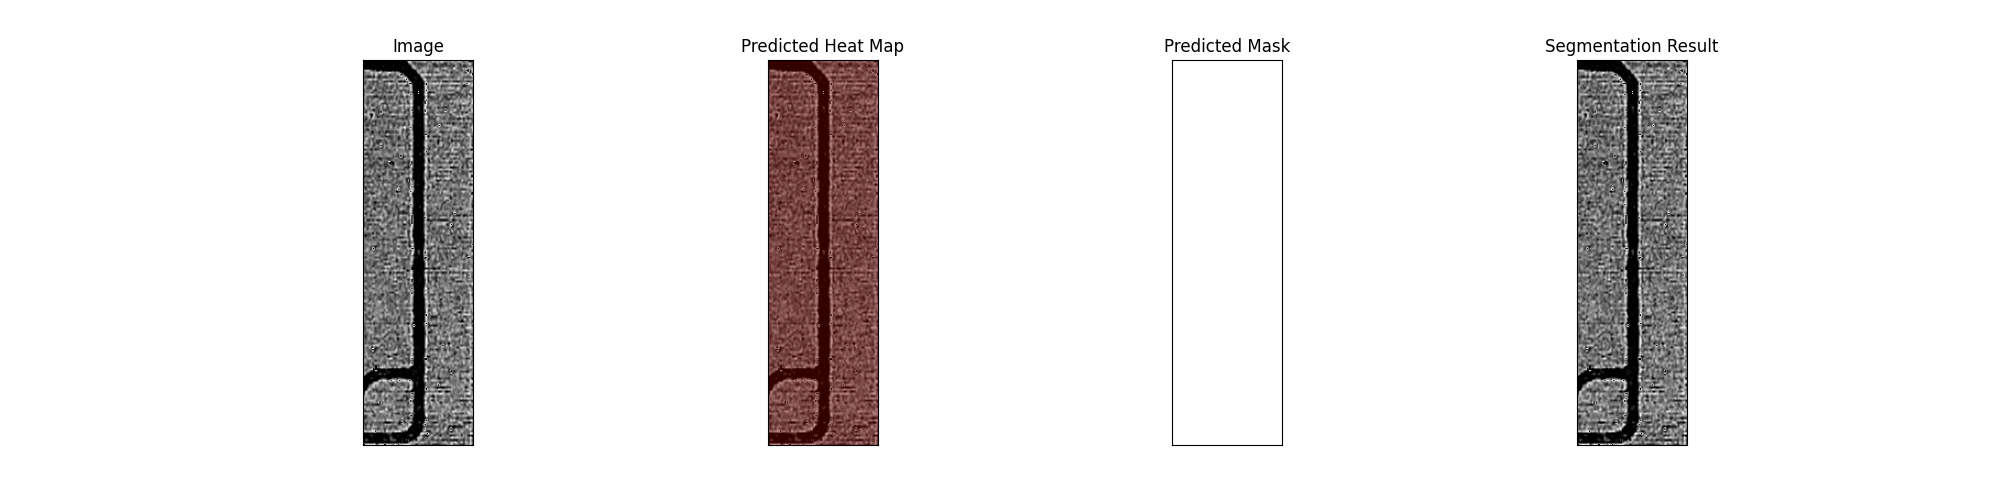

In [44]:
model_ = load_model(model_path)
preds = model_.predict(image=img_3)
visualizer = ImageVisualizer(
    mode=VisualizationMode.FULL,
    task=TaskType.SEGMENTATION)
out_img = visualizer.visualize_image(preds)
print(preds.pred_score)
Image.fromarray(out_img)

In [20]:
tmp_img

array([[236, 228, 228, ...,  42,  32,  34],
       [254, 254, 254, ...,  38,  32,  32],
       [254, 254, 254, ...,  38,  38,  28],
       ...,
       [  0,   0,   0, ...,  90,  94,   0],
       [  0,   0,   0, ...,  44,  46,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [22]:
model_path = f'{root}/models_pt_new/weights/torch/model.pt'
model_ = load_model(model_path)

pred_n = frm_path_to_pred(good_images[idx], tmp_img, model_)

/home/user/miniconda3/envs/anomalib_dataset/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at /opt/conda/conda-bld/pytorch_1712608853099/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


In [65]:
data_list = []
idx = 9
sm_gd_img = read_img(
    good_images[idx],
    )
img_i = frm_img_to_roi(
    sm_gd_img,
    tmp_img)
img_3 = prp_img(img_i)
preds = model_.predict(image=img_3)
print(preds.pred_score)
#out_img = visualizer.visualize_image(preds)
#Image.fromarray(out_img)

for i in tqdm(good_images, total=len(good_images)):
    sm_gd_img = read_img(i)
    img_i = frm_img_to_roi(
        sm_gd_img,
        tmp_img)
    img_3 = prp_img(img_i)
    preds = model_.predict(image=img_3)
    if preds.pred_score < 1:
        print(preds.pred_score)
        data_list.append(
            {
                'image': i,
                'score': preds.pred_score
            }
        )

1.0


  0%|          | 0/19106 [00:00<?, ?it/s]

0.18591446948941281


In [ ]:
frm_mdl_to

In [17]:
preds_ = frm_path_to_pred(
   path=data_list[0]['image'],
   tmp_img=tmp_img,
   mdl=model_)

NameError: name 'data_list' is not defined

In [23]:
pred_n.pred_score

1.0

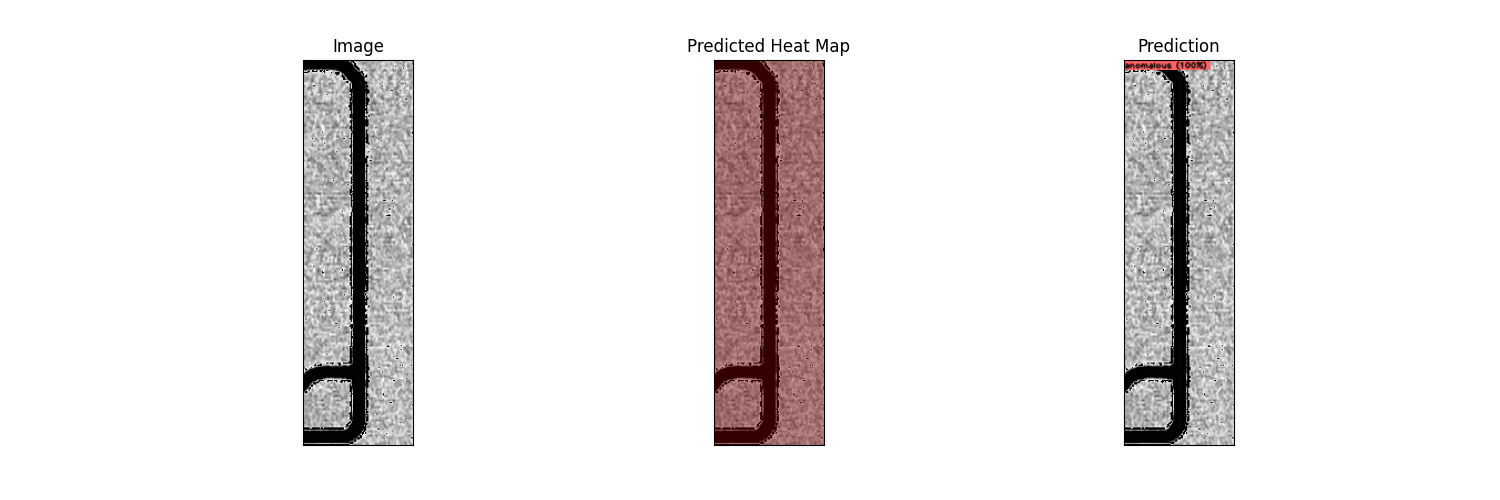

In [25]:
visualizer = ImageVisualizer(
    mode=VisualizationMode.FULL,
    task=TaskType.CLASSIFICATION)
out_img = visualizer.visualize_image(pred_n)
Image.fromarray(out_img)

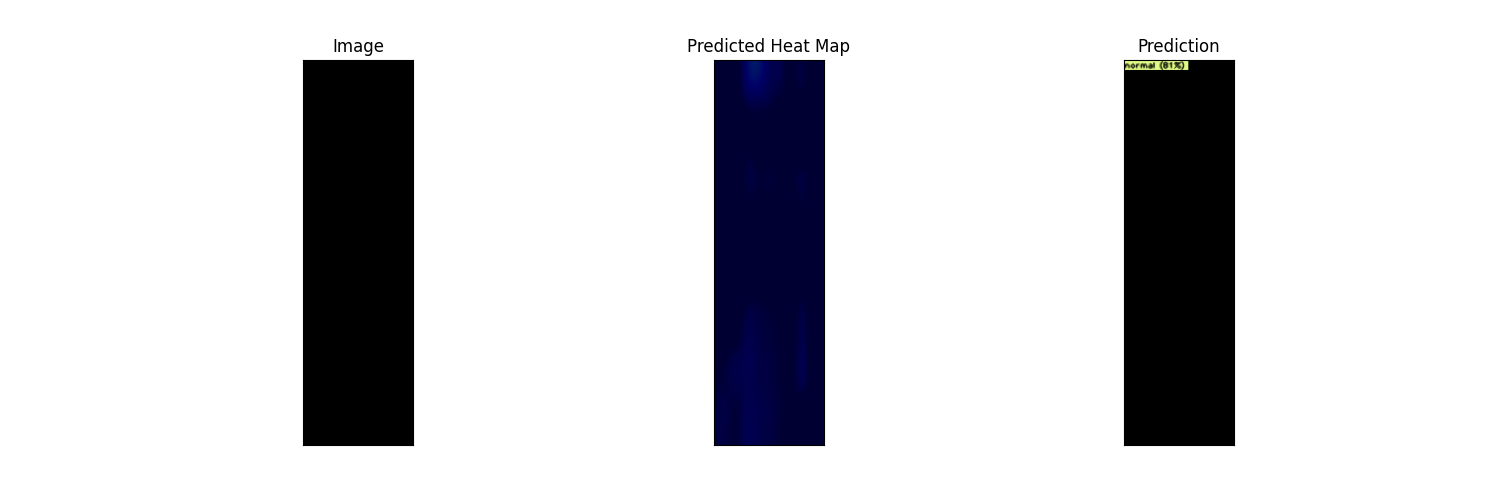

In [75]:
visualizer = ImageVisualizer(
    mode=VisualizationMode.FULL,
    task=TaskType.CLASSIFICATION)
out_img = visualizer.visualize_image(preds_)
Image.fromarray(out_img)